In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from numpy import random
import os
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm, t
import seaborn as sns
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel
from random import choice
import matplotlib
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats import proportion as ssp

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete 
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf 
from statsmodels.discrete.discrete_model import Poisson as psn 
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression



In [3]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df=df[['temp','atemp','hum','weathersit','windspeed','cnt']]

In [8]:
corr=df.corr()

In [10]:
corr

,temp,atemp,hum,weathersit,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.119503,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.120559,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,0.590277,-0.248506,-0.098543
weathersit,-0.119503,-0.120559,0.590277,1.000000,0.039769,-0.295929
windspeed,-0.158186,-0.183876,-0.248506,0.039769,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.295929,-0.235132,1.000000


- As per the above corr , only temp and atemp have strong relationship. So, temparature might influence the no of bikes rented

- As per the above corr , only temp and atemp have strong relationship. So, temparature might influence the no of bikes rented

In [14]:
weather_dum=pd.get_dummies(df.weathersit, drop_first=True , prefix='weather').astype(int)
df=df.drop('weathersit',axis=1)
df=pd.concat([df,weather_dum],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df.drop('cnt',axis=1),df.cnt, test_size=0.2, random_state=20)
x_train=sm.add_constant(x_train,prepend=False)
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     92.94
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.90e-81
Time:                        12:22:02   Log-Likelihood:                -5052.0
No. Observations:                 584   AIC:                         1.012e+04
Df Residuals:                     577   BIC:                         1.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp        -134.1038    100.129     -1.339      0.1

Ho - temp does not influence the count of bikes rented , as the pval>0.05 we do not rejecct Ho 
Hence temp does not influence the count of bikes 

- The model explains only 49% variance which doesnt gives strong factors
We will take other factors into the consideration 

In [20]:
y_pred = model.predict(sm.add_constant(x_test, prepend=False))
from sklearn.metrics import r2_score
print("R² Score on Test Data:", r2_score(y_test, y_pred))


R² Score on Test Data: 0.3873655406219292


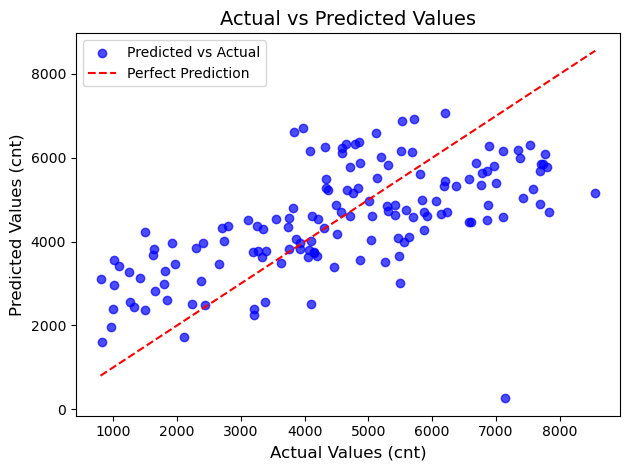

In [22]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values (cnt)', fontsize=12)
plt.ylabel('Predicted Values (cnt)', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)

plt.legend()
plt.tight_layout()

In [288]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [290]:
df=df[['season','yr','weathersit','cnt','temp']]

In [292]:
weather_dum=pd.get_dummies(df.weathersit, drop_first=True , prefix='weather').astype(int)
df=df.drop('weathersit',axis=1)
df=pd.concat([df,weather_dum],axis=1)

In [294]:
sns_dum=pd.get_dummies(df.season, drop_first=True , prefix='season').astype(int)
df=df.drop('season',axis=1)
df=pd.concat([df,sns_dum],axis=1)

In [296]:
yr_dum=pd.get_dummies(df.yr, drop_first=True , prefix='yr').astype(int)
df=df.drop('yr',axis=1)
df=pd.concat([df,yr_dum],axis=1)

In [298]:
df.head()

,cnt,temp,weather_2,weather_3,season_2,season_3,season_4,yr_1
0,985,14.110847,1,0,0,0,0,0
1,801,14.902598,1,0,0,0,0,0
2,1349,8.050924,0,0,0,0,0,0
3,1562,8.200000,0,0,0,0,0,0
4,1600,9.305237,0,0,0,0,0,0


In [300]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('cnt',axis=1),df.cnt, test_size=0.2, random_state=20)

In [302]:
x_train=sm.add_constant(x_train,prepend=False)

In [304]:
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     327.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.88e-196
Time:                        21:32:58   Log-Likelihood:                -4780.4
No. Observations:                 584   AIC:                             9577.
Df Residuals:                     576   BIC:                             9612.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp         114.8940      8.631     13.311      0.0

In [324]:
from sklearn.metrics import r2_score

In [326]:
y_pred = model.predict(sm.add_constant(x_test, prepend=False))
from sklearn.metrics import r2_score
print("R² Score on Test Data:", r2_score(y_test, y_pred))


R² Score on Test Data: 0.8308780839358721


In [329]:
for i in range(df.shape[1]):
    print('coulmn',i ,'has VIF factor as ', variance_inflation_factor(df.values,i))

coulmn 0 has VIF factor as  32.68380995928533
coulmn 1 has VIF factor as  23.421099044753458
coulmn 2 has VIF factor as  1.588140905702892
coulmn 3 has VIF factor as  1.2597693810058297
coulmn 4 has VIF factor as  3.7395516446106907
coulmn 5 has VIF factor as  5.394999959848348
coulmn 6 has VIF factor as  3.213540107089786
coulmn 7 has VIF factor as  4.916710259273509


In [331]:
df.columns

Index(['cnt', 'temp', 'weather_2', 'weather_3', 'season_2', 'season_3',
       'season_4', 'yr_1'],
      dtype='object')

In [333]:
len(y_pred)

146

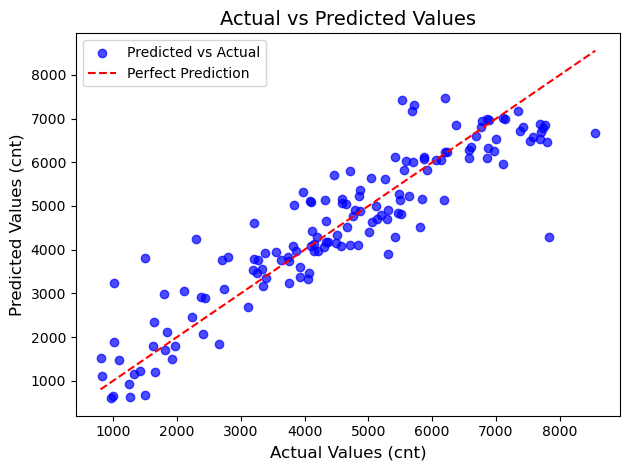

In [335]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values (cnt)', fontsize=12)
plt.ylabel('Predicted Values (cnt)', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)

plt.legend()
plt.tight_layout()